In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## se importan los datos
pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv")
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv")
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/InformeEpidemiologico/CasosFallecidosPorComuna.csv")

data1 = pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv")
vacunas = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv")
fallecidos = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/InformeEpidemiologico/CasosFallecidosPorComuna.csv")

In [44]:
data1

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015
5,13106,0.790810,0.784378,0.729145,0.735,0.767604
6,13107,0.726330,0.775631,0.641707,0.737,0.712375
7,13108,0.821551,0.751105,0.722493,0.709,0.763935
8,13109,0.856570,0.835740,0.860235,0.775,0.850780
9,13110,0.773094,0.824255,0.791155,0.804,0.795888


In [45]:
vacunas

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,544.0,172.0,0.0,435.0,549.0,792.0,1123.0,1064.0,421.0,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,8.0,11.0,11.0,7.0,9.0,0.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
fallecidos

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,...,2021-06-07,2021-06-11,2021-06-14,2021-06-18,2021-06-21,2021-06-25,2021-06-28,2021-07-02,2021-07-05,2021-07-09
0,Arica y Parinacota,15.0,Arica,15101.0,247552.0,10.0,11.0,12.0,12.0,22.0,...,533.0,540.0,545.0,554.0,557.0,558.0,563.0,570.0,580.0,583.0
1,Arica y Parinacota,15.0,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
2,Arica y Parinacota,15.0,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Arica y Parinacota,15.0,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arica y Parinacota,15.0,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,Magallanes y la Antartica,12.0,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
389,Magallanes y la Antartica,12.0,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,Magallanes y la Antartica,12.0,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,Magallanes y la Antartica,12.0,Desconocido Magallanes,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
RM = fallecidos[fallecidos['Region'] =='Metropolitana']
RM

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,...,2021-06-07,2021-06-11,2021-06-14,2021-06-18,2021-06-21,2021-06-25,2021-06-28,2021-07-02,2021-07-05,2021-07-09
100,Metropolitana,13.0,Alhue,13502.0,7405.0,0.0,0.0,1.0,1.0,1.0,...,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,13.0
101,Metropolitana,13.0,Buin,13402.0,109641.0,24.0,26.0,32.0,34.0,46.0,...,185.0,191.0,194.0,199.0,198.0,202.0,206.0,209.0,215.0,218.0
102,Metropolitana,13.0,Calera de Tango,13403.0,28525.0,0.0,0.0,1.0,2.0,3.0,...,38.0,39.0,39.0,40.0,41.0,41.0,43.0,45.0,45.0,45.0
103,Metropolitana,13.0,Cerrillos,13102.0,88956.0,19.0,24.0,31.0,35.0,42.0,...,196.0,197.0,198.0,201.0,204.0,206.0,207.0,213.0,220.0,224.0
104,Metropolitana,13.0,Cerro Navia,13103.0,142465.0,77.0,95.0,108.0,122.0,173.0,...,502.0,510.0,514.0,524.0,523.0,531.0,543.0,553.0,555.0,563.0
105,Metropolitana,13.0,Colina,13301.0,180353.0,31.0,37.0,42.0,50.0,67.0,...,237.0,238.0,241.0,248.0,254.0,257.0,262.0,267.0,272.0,278.0
106,Metropolitana,13.0,Conchali,13104.0,139195.0,69.0,77.0,106.0,118.0,152.0,...,484.0,492.0,500.0,506.0,510.0,517.0,522.0,527.0,534.0,536.0
107,Metropolitana,13.0,Curacavi,13503.0,36430.0,4.0,4.0,6.0,6.0,10.0,...,54.0,54.0,54.0,55.0,56.0,56.0,58.0,58.0,60.0,62.0
108,Metropolitana,13.0,El Bosque,13105.0,172000.0,47.0,60.0,80.0,88.0,129.0,...,498.0,505.0,513.0,518.0,530.0,534.0,543.0,547.0,551.0,560.0
109,Metropolitana,13.0,El Monte,13602.0,40014.0,6.0,6.0,13.0,13.0,23.0,...,88.0,90.0,90.0,91.0,92.0,93.0,95.0,96.0,97.0,100.0


In [66]:
RM = RM.drop([152,153],axis=0)
RM

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,...,2021-06-07,2021-06-11,2021-06-14,2021-06-18,2021-06-21,2021-06-25,2021-06-28,2021-07-02,2021-07-05,2021-07-09
100,Metropolitana,13.0,Alhue,13502.0,7405.0,0.0,0.0,1.0,1.0,1.0,...,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,13.0
101,Metropolitana,13.0,Buin,13402.0,109641.0,24.0,26.0,32.0,34.0,46.0,...,185.0,191.0,194.0,199.0,198.0,202.0,206.0,209.0,215.0,218.0
102,Metropolitana,13.0,Calera de Tango,13403.0,28525.0,0.0,0.0,1.0,2.0,3.0,...,38.0,39.0,39.0,40.0,41.0,41.0,43.0,45.0,45.0,45.0
103,Metropolitana,13.0,Cerrillos,13102.0,88956.0,19.0,24.0,31.0,35.0,42.0,...,196.0,197.0,198.0,201.0,204.0,206.0,207.0,213.0,220.0,224.0
104,Metropolitana,13.0,Cerro Navia,13103.0,142465.0,77.0,95.0,108.0,122.0,173.0,...,502.0,510.0,514.0,524.0,523.0,531.0,543.0,553.0,555.0,563.0
105,Metropolitana,13.0,Colina,13301.0,180353.0,31.0,37.0,42.0,50.0,67.0,...,237.0,238.0,241.0,248.0,254.0,257.0,262.0,267.0,272.0,278.0
106,Metropolitana,13.0,Conchali,13104.0,139195.0,69.0,77.0,106.0,118.0,152.0,...,484.0,492.0,500.0,506.0,510.0,517.0,522.0,527.0,534.0,536.0
107,Metropolitana,13.0,Curacavi,13503.0,36430.0,4.0,4.0,6.0,6.0,10.0,...,54.0,54.0,54.0,55.0,56.0,56.0,58.0,58.0,60.0,62.0
108,Metropolitana,13.0,El Bosque,13105.0,172000.0,47.0,60.0,80.0,88.0,129.0,...,498.0,505.0,513.0,518.0,530.0,534.0,543.0,547.0,551.0,560.0
109,Metropolitana,13.0,El Monte,13602.0,40014.0,6.0,6.0,13.0,13.0,23.0,...,88.0,90.0,90.0,91.0,92.0,93.0,95.0,96.0,97.0,100.0


In [70]:
col_list=list(RM)

col_list.remove('Poblacion')
col_list.remove('Region')
col_list.remove('Codigo comuna')
col_list.remove('Comuna')
col_list.remove('Codigo region')

RM["Total_fallecidos"] = RM[col_list].sum(axis=1)
RM

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,...,2021-06-14,2021-06-18,2021-06-21,2021-06-25,2021-06-28,2021-07-02,2021-07-05,2021-07-09,Total,Total_fallecidos
100,Metropolitana,13.0,Alhue,13502.0,7405.0,0.0,0.0,1.0,1.0,1.0,...,11.0,11.0,11.0,12.0,12.0,12.0,12.0,13.0,680.0,1360.0
101,Metropolitana,13.0,Buin,13402.0,109641.0,24.0,26.0,32.0,34.0,46.0,...,194.0,199.0,198.0,202.0,206.0,209.0,215.0,218.0,13811.0,27622.0
102,Metropolitana,13.0,Calera de Tango,13403.0,28525.0,0.0,0.0,1.0,2.0,3.0,...,39.0,40.0,41.0,41.0,43.0,45.0,45.0,45.0,2005.0,4010.0
103,Metropolitana,13.0,Cerrillos,13102.0,88956.0,19.0,24.0,31.0,35.0,42.0,...,198.0,201.0,204.0,206.0,207.0,213.0,220.0,224.0,13980.0,27960.0
104,Metropolitana,13.0,Cerro Navia,13103.0,142465.0,77.0,95.0,108.0,122.0,173.0,...,514.0,524.0,523.0,531.0,543.0,553.0,555.0,563.0,37772.0,75544.0
105,Metropolitana,13.0,Colina,13301.0,180353.0,31.0,37.0,42.0,50.0,67.0,...,241.0,248.0,254.0,257.0,262.0,267.0,272.0,278.0,17668.0,35336.0
106,Metropolitana,13.0,Conchali,13104.0,139195.0,69.0,77.0,106.0,118.0,152.0,...,500.0,506.0,510.0,517.0,522.0,527.0,534.0,536.0,36292.0,72584.0
107,Metropolitana,13.0,Curacavi,13503.0,36430.0,4.0,4.0,6.0,6.0,10.0,...,54.0,55.0,56.0,56.0,58.0,58.0,60.0,62.0,3311.0,6622.0
108,Metropolitana,13.0,El Bosque,13105.0,172000.0,47.0,60.0,80.0,88.0,129.0,...,513.0,518.0,530.0,534.0,543.0,547.0,551.0,560.0,34768.0,69536.0
109,Metropolitana,13.0,El Monte,13602.0,40014.0,6.0,6.0,13.0,13.0,23.0,...,90.0,91.0,92.0,93.0,95.0,96.0,97.0,100.0,6413.0,12826.0


In [72]:
RM=RM[['Region','Comuna','Codigo comuna','Poblacion','Total_fallecidos']]
RM

,Region,Comuna,Codigo comuna,Poblacion,Total_fallecidos
100,Metropolitana,Alhue,13502.0,7405.0,1360.0
101,Metropolitana,Buin,13402.0,109641.0,27622.0
102,Metropolitana,Calera de Tango,13403.0,28525.0,4010.0
103,Metropolitana,Cerrillos,13102.0,88956.0,27960.0
104,Metropolitana,Cerro Navia,13103.0,142465.0,75544.0
105,Metropolitana,Colina,13301.0,180353.0,35336.0
106,Metropolitana,Conchali,13104.0,139195.0,72584.0
107,Metropolitana,Curacavi,13503.0,36430.0,6622.0
108,Metropolitana,El Bosque,13105.0,172000.0,69536.0
109,Metropolitana,El Monte,13602.0,40014.0,12826.0


In [74]:
RegionM=vacunas[vacunas['Region']=='Metropolitana']
RegionM

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,0.0,15.0,10.0,30.0,15.0,20.0,0.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,464.0,188.0,0.0,301.0,250.0,668.0,436.0,251.0,0.0,0.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,44.0,26.0,110.0,119.0,91.0,0.0,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,314.0,144.0,0.0,240.0,172.0,312.0,191.0,125.0,189.0,0.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,563.0,298.0,44.0,489.0,387.0,378.0,272.0,206.0,476.0,210.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,502.0,6.0,0.0,474.0,182.0,646.0,579.0,188.0,12.0,0.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,638.0,265.0,0.0,506.0,367.0,441.0,345.0,280.0,488.0,0.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,106.0,0.0,0.0,51.0,36.0,129.0,90.0,57.0,0.0,0.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,592.0,140.0,0.0,479.0,421.0,882.0,904.0,582.0,164.0,0.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,108.0,32.0,0.0,35.0,31.0,146.0,118.0,97.0,23.0,0.0


In [75]:
col_list=list(RegionM)

col_list.remove('Poblacion')
col_list.remove('Region')
col_list.remove('Comuna')
col_list.remove('Codigo region')
col_list.remove('Codigo comuna')

RegionM=vacunas[vacunas["Region"].str.contains("Metropolitana")]
RegionM=RegionM.drop([140],axis=0)

RegionM["Total_vacunados"] = RegionM[col_list].sum(axis=1)
RegionM

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11,Total_vacunados
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,10.0,30.0,15.0,20.0,0.0,0.0,6232.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,188.0,0.0,301.0,250.0,668.0,436.0,251.0,0.0,0.0,74943.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,44.0,26.0,110.0,119.0,91.0,0.0,0.0,21869.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,144.0,0.0,240.0,172.0,312.0,191.0,125.0,189.0,0.0,50012.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,298.0,44.0,489.0,387.0,378.0,272.0,206.0,476.0,210.0,74917.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,474.0,182.0,646.0,579.0,188.0,12.0,0.0,94464.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,265.0,0.0,506.0,367.0,441.0,345.0,280.0,488.0,0.0,99163.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,51.0,36.0,129.0,90.0,57.0,0.0,0.0,24079.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,140.0,0.0,479.0,421.0,882.0,904.0,582.0,164.0,0.0,101296.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,35.0,31.0,146.0,118.0,97.0,23.0,0.0,23088.0


In [76]:
RegionM=RegionM[['Region','Comuna','Codigo comuna','Poblacion','Total_vacunados']]
RegionM

,Region,Comuna,Codigo comuna,Poblacion,Total_vacunados
88,Metropolitana,Alhue,13502.0,7405.0,6232.0
89,Metropolitana,Buin,13402.0,109641.0,74943.0
90,Metropolitana,Calera de Tango,13403.0,28525.0,21869.0
91,Metropolitana,Cerrillos,13102.0,88956.0,50012.0
92,Metropolitana,Cerro Navia,13103.0,142465.0,74917.0
93,Metropolitana,Colina,13301.0,180353.0,94464.0
94,Metropolitana,Conchali,13104.0,139195.0,99163.0
95,Metropolitana,Curacavi,13503.0,36430.0,24079.0
96,Metropolitana,El Bosque,13105.0,172000.0,101296.0
97,Metropolitana,El Monte,13602.0,40014.0,23088.0


In [77]:
data1.rename(columns = {'comuna' : 'Codigo comuna'}, inplace = True)

In [90]:
rm = RM 
rm = RM[['Codigo comuna','Total_fallecidos',]]
rm

,Codigo comuna,Total_fallecidos
100,13502.0,1360.0
101,13402.0,27622.0
102,13403.0,4010.0
103,13102.0,27960.0
104,13103.0,75544.0
105,13301.0,35336.0
106,13104.0,72584.0
107,13503.0,6622.0
108,13105.0,69536.0
109,13602.0,12826.0


In [78]:
data1

,Codigo comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015
5,13106,0.790810,0.784378,0.729145,0.735,0.767604
6,13107,0.726330,0.775631,0.641707,0.737,0.712375
7,13108,0.821551,0.751105,0.722493,0.709,0.763935
8,13109,0.856570,0.835740,0.860235,0.775,0.850780
9,13110,0.773094,0.824255,0.791155,0.804,0.795888


In [91]:
W = pd.merge(RegionM,data1,how='inner', on='Codigo comuna')
W

,Region,Comuna,Codigo comuna,Poblacion,Total_vacunados,LEI,II,EI,idh,HDI
0,Metropolitana,Alhue,13502.0,7405.0,6232.0,0.876923,0.756470,0.617345,NaN,0.742609
1,Metropolitana,Buin,13402.0,109641.0,74943.0,0.742570,0.822340,0.737301,NaN,0.766439
2,Metropolitana,Calera de Tango,13403.0,28525.0,21869.0,0.801109,0.760228,0.601466,NaN,0.715509
3,Metropolitana,Cerrillos,13102.0,88956.0,50012.0,0.782817,0.800343,0.713499,0.743,0.764616
4,Metropolitana,Cerro Navia,13103.0,142465.0,74917.0,0.752447,0.750382,0.657961,0.683,0.718874
5,Metropolitana,Colina,13301.0,180353.0,94464.0,0.667378,0.787350,0.625280,NaN,0.690036
6,Metropolitana,Conchali,13104.0,139195.0,99163.0,0.784872,0.760697,0.705426,0.707,0.749584
7,Metropolitana,Curacavi,13503.0,36430.0,24079.0,0.811913,0.766193,0.647025,NaN,0.738340
8,Metropolitana,El Bosque,13105.0,172000.0,101296.0,0.777236,0.780019,0.673876,0.711,0.742015
9,Metropolitana,El Monte,13602.0,40014.0,23088.0,0.740793,0.766459,0.679887,NaN,0.728127


In [93]:
Q = pd.merge(rm,W,how='inner', on='Codigo comuna')
Q

,Codigo comuna,Total_fallecidos,Region,Comuna,Poblacion,Total_vacunados,LEI,II,EI,idh,HDI
0,13502.0,1360.0,Metropolitana,Alhue,7405.0,6232.0,0.876923,0.756470,0.617345,NaN,0.742609
1,13402.0,27622.0,Metropolitana,Buin,109641.0,74943.0,0.742570,0.822340,0.737301,NaN,0.766439
2,13403.0,4010.0,Metropolitana,Calera de Tango,28525.0,21869.0,0.801109,0.760228,0.601466,NaN,0.715509
3,13102.0,27960.0,Metropolitana,Cerrillos,88956.0,50012.0,0.782817,0.800343,0.713499,0.743,0.764616
4,13103.0,75544.0,Metropolitana,Cerro Navia,142465.0,74917.0,0.752447,0.750382,0.657961,0.683,0.718874
5,13301.0,35336.0,Metropolitana,Colina,180353.0,94464.0,0.667378,0.787350,0.625280,NaN,0.690036
6,13104.0,72584.0,Metropolitana,Conchali,139195.0,99163.0,0.784872,0.760697,0.705426,0.707,0.749584
7,13503.0,6622.0,Metropolitana,Curacavi,36430.0,24079.0,0.811913,0.766193,0.647025,NaN,0.738340
8,13105.0,69536.0,Metropolitana,El Bosque,172000.0,101296.0,0.777236,0.780019,0.673876,0.711,0.742015
9,13602.0,12826.0,Metropolitana,El Monte,40014.0,23088.0,0.740793,0.766459,0.679887,NaN,0.728127


In [118]:
mod = sm.OLS(Q.Total_fallecidos, Q.Total_vacunados)
res = mod.fit()

print(res.summary())
pred1 = res

                                 OLS Regression Results                                
Dep. Variable:       Total_fallecidos   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              347.0
Date:                Mon, 12 Jul 2021   Prob (F-statistic):                    2.09e-24
Time:                        23:41:28   Log-Likelihood:                         -595.79
No. Observations:                  52   AIC:                                      1194.
Df Residuals:                      51   BIC:                                      1196.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

ValueError: x and y must have same first dimension, but have shapes (52, 1) and (1,)

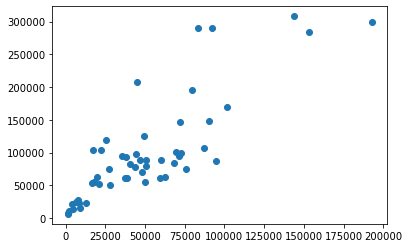

In [119]:
x= Q.Total_fallecidos
y= Q.Total_vacunados

plt.scatter(x,y)
plt.plot(pd.DataFrame(x), pred1 ,c='red')
plt.xlabel('Total Fallecidos')
plt.ylabel('Total Vacunados')


In [120]:
mod = sm.OLS(Q.Total_fallecidos, Q.HDI)
res = mod.fit()

print(res.summary())

pred2 = res

                                 OLS Regression Results                                
Dep. Variable:       Total_fallecidos   R-squared (uncentered):                   0.615
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              81.37
Date:                Mon, 12 Jul 2021   Prob (F-statistic):                    3.84e-12
Time:                        23:42:00   Log-Likelihood:                         -624.41
No. Observations:                  52   AIC:                                      1251.
Df Residuals:                      51   BIC:                                      1253.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

ValueError: x and y must have same first dimension, but have shapes (52, 1) and (1,)

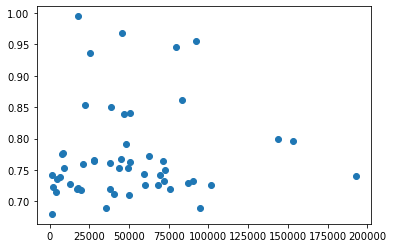

In [121]:
x= Q.Total_fallecidos
y= Q.HDI

plt.scatter(x,y)
plt.plot(pd.DataFrame(x), pred2 ,c='red')
plt.xlabel('Total Fallecidos')
plt.ylabel('HDI')


In [ ]:
## se podria decir que hay una relacion entre HDI con los fallecidos, 
## ya que en teoria los que tienen una mayor HDI tienen menos casos de fallecidos, 
## ya que estos tienen mejor desarrollo en la educacion, salud e ingresos por ende se podria decir que 
## por ello su esperanza de vida es mayor a comparacion con los que su HDI es mas bajo 
## como se aprecia en las regresiones y gradicos.